In [1]:
import praw
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import squarify
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# adding wsb/reddit flavour to vader to improve sentiment analysis, score: 4.0 to -4.0
new_words = {
    'citron': -4.0,  
    'hidenburg': -4.0,        
    'moon': 4.0,
    'highs': 2.0,
    'mooning': 4.0,
    'long': 2.0,
    'short': -2.0,
    'call': 4.0,
    'calls': 4.0,    
    'put': -4.0,
    'puts': -4.0,    
    'break': 2.0,
    'tendie': 2.0,
     'tendies': 2.0,
     'town': 2.0,     
     'overvalued': -3.0,
     'undervalued': 3.0,
     'buy': 4.0,
     'sell': -4.0,
     'gone': -1.0,
     'gtfo': -1.7,
     'paper': -1.7,
     'bullish': 3.7,
     'bearish': -3.7,
     'bagholder': -1.7,
     'stonk': 1.9,
     'green': 1.9,
     'money': 1.2,
     'print': 2.2,
     'rocket': 2.2,
     'bull': 2.9,
     'bear': -2.9,
     'pumping': -1.0,
     'sus': -3.0,
     'offering': -2.3,
     'rip': -4.0,
     'downgrade': -3.0,
     'upgrade': 3.0,     
     'maintain': 1.0,          
     'pump': 1.9,
     'hot': 1.5,
     'drop': -2.5,
     'rebound': 1.5,  
     'crack': 2.5,}

vader = SentimentIntensityAnalyzer()
vader.lexicon.update(new_words)

In [3]:
blacklist = ['RAW','THE','BUT','USA','AUG','UK','STAY','SEP','IRS','EDIT','YOLO','IT','DOWAM','JUL','ROPE','CEO','WTF',
             'TL;DR','AYYMD','HQ','BE','DD','I','FOMO','MACD','FD','PRAY','IL','RIP','CPU','OCT','EZ','LGMA','A','OUT',
             'RH','BIG','OTM','SEC','STILL','NOW','ATM','RISEIPA','CA','NOV','TYS','RIDE','LPT','TICK','FOR','LMFAO',
             'EOD','PR','COD','OPEN','SO','POS','PS','BEZOS','OP','ATH','ELON','AT','TOS','DEC','BMW','IV','USD',
             'GG','ARE','URL','FL','HAS','ON','EV','US','PC','GO','NOT','U','CFO','GOAT','ITM','WSB','IMO','KYS','CAN',
             'ALL','FEB','LOL','ROFL','IPO','SEE','AH','IS','RED','ISIS','FIFA','OR','DJIA','DR','FBI','DOJ','JAN','SSN',
             'LOVE','LMAO','OK','SEPT','ER','GDP','ONE','Mar','PDT','GOD','PT','PDFUA','TL','MILF','GOOD','CTO','PM','ICE',
             'AM','BY','FDA','BTFD']

In [4]:
# https://www.nasdaq.com/market-activity/stocks/screener
# NYSE NASDAQ AMEX, Mega Large Medium Small Cap (mktcap >= $300m)
# csv 받은 것에서 중복 제거 미리 하고 가져옴 (그 정도는 금방 하니까 괜찮음. 매월 초 업데이트 한다)
stockcode = pd.read_csv('US_Tickers_20210402.csv')
stockcode = stockcode['Symbol'].to_list()
stockcode

['A',
 'AA',
 'AACQ',
 'AAL',
 'AAN',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAWW',
 'AB',
 'ABB',
 'ABBV',
 'ABC',
 'ABCB',
 'ABCL',
 'ABCM',
 'ABEV',
 'ABG',
 'ABM',
 'ABMD',
 'ABNB',
 'ABR',
 'ABST',
 'ABT',
 'ABTX',
 'ABUS',
 'AC',
 'ACA',
 'ACAD',
 'ACB',
 'ACBI',
 'ACC',
 'ACCD',
 'ACCO',
 'ACEL',
 'ACGL',
 'ACH',
 'ACHC',
 'ACI',
 'ACIC',
 'ACII',
 'ACIU',
 'ACIW',
 'ACLS',
 'ACM',
 'ACMR',
 'ACN',
 'ACND',
 'ACRE',
 'ACRS',
 'ACTC',
 'ACTG',
 'ACV',
 'ACVA',
 'ADAG',
 'ADAP',
 'ADBE',
 'ADC',
 'ADCT',
 'ADER',
 'ADI',
 'ADM',
 'ADNT',
 'ADP',
 'ADPT',
 'ADS',
 'ADSK',
 'ADT',
 'ADTN',
 'ADUS',
 'ADV',
 'ADVM',
 'ADX',
 'AEE',
 'AEF',
 'AEG',
 'AEGN',
 'AEIS',
 'AEL',
 'AEM',
 'AENZ',
 'AEO',
 'AEP',
 'AER',
 'AERI',
 'AES',
 'AEVA',
 'AFB',
 'AFG',
 'AFIB',
 'AFIN',
 'AFL',
 'AFMD',
 'AFRM',
 'AFYA',
 'AG',
 'AGAC',
 'AGC',
 'AGCB',
 'AGCO',
 'AGEN',
 'AGI',
 'AGIO',
 'AGLE',
 'AGM',
 'AGMH',
 'AGNC',
 'AGO',
 'AGR',
 'AGRO',
 'AGX',
 'AGYS',
 'AHCO',
 'AHH',
 'AI',
 'AIG',
 'AIMC

It took 1847.41 seconds to analyze 29936 comments in 124 posts in 4 subreddits.

Posts analyzed saved in titles

30 most mentioned picks: 
GME: 646
TSLA: 248
AMC: 204
PLTR: 190
NIO: 74
ASO: 48
AAPL: 48
AMD: 47
RKT: 42
VIAC: 39
MVIS: 38
BB: 36
APHA: 33
R: 30
TSM: 26
X: 23
F: 21
CRSR: 21
UWMC: 19
MSFT: 17
DISCA: 16
FB: 15
TV: 14
BABA: 14
TLRY: 13
V: 13
CHPT: 12
FUBO: 11
AMZN: 11
NOK: 11

Sentiment analysis of top 30 picks:
      Bearish Neutral Bullish Total/Compound
GME     0.087   0.762   0.151          0.147
TSLA    0.096   0.752   0.152          0.137
AMC     0.155   0.701   0.144         -0.022
PLTR    0.117   0.741   0.142          0.097
NIO     0.112   0.768   0.121          0.095
ASO     0.098   0.720   0.182          0.160
AAPL    0.096   0.770   0.134          0.192
AMD     0.051   0.721   0.228          0.431
RKT     0.103   0.746   0.152          0.093
VIAC    0.066   0.756   0.178          0.256
MVIS    0.079   0.806   0.115          0.063
BB      0.086   0.757   0.157      

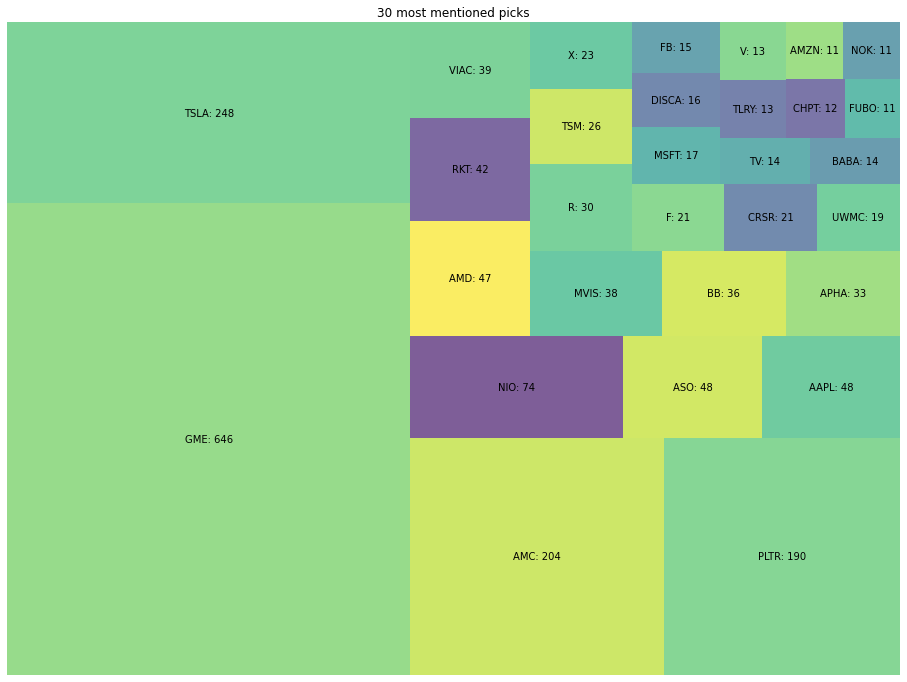

<Figure size 1152x864 with 0 Axes>

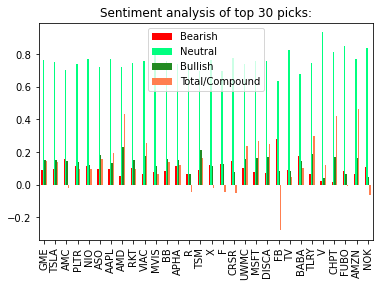

In [5]:
start_time = time.time()

# API 호출 정보 
with open("RedditAPI.txt", "r") as f:
    lines = f.readlines()
    username = lines[0].strip()
    password = lines[1].strip()
    client_id = lines[3].strip()
    client_secret = lines[4].strip()
    user_agent = lines[8].strip()

# reddit API wrapper: praw
reddit = praw.Reddit(user_agent=user_agent,
    client_id=client_id,
    client_secret=client_secret,
    username=username,
    password=password)

# program parameters

# sub-reddit to search: 참여자 수가 많은 4개 subreddit
subs = ['wallstreetbets','stocks','StockMarket','investing']     
# posts flairs to search || None flair is automatically considered: subreddit 안에 있는 카테고리
post_flairs = {'Daily Discussion','Weekend Discussion','Discussion',
               'Company News','Trades','Company Analysis',
               'Fundamentals/DD','Valuation','Opinion'}    
goodAuth = {'AutoModerator'}   # authors whom comments are allowed more than once
uniqueCmt = True                # allow one comment per author per symbol
ignoreAuthP = {'example'}       # authors to ignore for posts 
ignoreAuthC = {'example'}       # authors to ignore for comment 
upvoteRatio = 0.70         # upvote ratio for post to be considered, 0.70 = 70% (추천 많이 받은 글만 판정)
ups = 10       # define # of upvotes, post is considered if upvotes exceed this # (추천 10개 필요)
limit = 1000     # define the limit, comments 'replace more' limit 
upvotes = 2     # define # of upvotes, comment is considered if upvotes exceed this # (댓글은 추천 2개 필요)
picks = 30     # define # of picks here, prints as "Top ## picks are:"  (top 30개 뽑기)
picks_ayz = 30   # define # of picks for sentiment analysis (top 30개 sentiment analysis)

posts, count, c_analyzed, tickers, titles, a_comments = 0, 0, 0, {}, [], {}
cmt_auth = {}

# subreddit 목록에서 반복
for sub in subs:
    subreddit = reddit.subreddit(sub)
    hot_python = subreddit.hot()    # posting은 hot 먼저
    
    # Extracting comments, symbols from subreddit
    for submission in hot_python:
        flair = submission.link_flair_text 
        author = submission.author.name         
        
        # posting 추천 비율, 추천 수, 카테고리, 작성자 필터링 
        if submission.upvote_ratio >= upvoteRatio and submission.ups > ups and (flair in post_flairs or flair is None) and author not in ignoreAuthP:   
            # 댓글 최신순
            submission.comment_sort = 'new'     
            comments = submission.comments
            titles.append(submission.title)
            posts += 1
            try: 
                # 댓글 추가 소환 500회 제한
                submission.comments.replace_more(limit=limit)   
                for comment in comments:
                    # try except for deleted account?
                    try: auth = comment.author.name
                    except: pass
                    c_analyzed += 1
                    
                    # 댓글 추천 수, 작성자 필터링
                    if comment.score > upvotes and auth not in ignoreAuthC: 
                        # 공백으로 구분
                        split = comment.body.split(" ")
                        for word in split:
                            # $ 표시 제거
                            word = word.replace("$", "")        
                            # upper = ticker, length of ticker <= 5, excluded words,                     
                            if word.isupper() and len(word) <= 5 and word not in blacklist and word in stockcode:
                                
                                # unique comments, try/except for key errors
                                # 적절한 작성자가 아닐 경우 (작성자 1인은 티커 1개에 대한 댓글 1개까지만 체크)
                                # 이미 나온 작성자면 그 댓글은 분석 목적으로 추가 안 할 것
                                if uniqueCmt and auth not in goodAuth:
                                    try: 
                                        if auth in cmt_auth[word]: break
                                    except: pass
                                    
                                # counting tickers
                                # ticker의 count 추가(언급 수 추가됨), 댓글 text 추가, 작성자 추가
                                # ticker가 기존에 언급되지 않았던 경우에는 ticker 자체가 추가되면서 count 1로 잡힘
                                if word in tickers:
                                    tickers[word] += 1
                                    a_comments[word].append(comment.body)
                                    cmt_auth[word].append(auth)
                                    count += 1
                                else:                               
                                    tickers[word] = 1
                                    cmt_auth[word] = [auth]
                                    a_comments[word] = [comment.body]
                                    count += 1   
            except Exception as e: print(e)
            
                       

# sorts the dictionary
# 언급 많은 순으로 정렬
symbols = dict(sorted(tickers.items(), key=lambda item: item[1], reverse = True))
top_picks = list(symbols.keys())[0:picks]
time = (time.time() - start_time)

# print top picks
print("It took {t:.2f} seconds to analyze {c} comments in {p} posts in {s} subreddits.\n".format(t=time, c=c_analyzed, p=posts, s=len(subs)))
print("Posts analyzed saved in titles")
#for i in titles: print(i)  # prints the title of the posts analyzed


print(f"\n{picks} most mentioned picks: ")
times = []
top = []
for i in top_picks:
    print(f"{i}: {symbols[i]}")
    times.append(symbols[i])
    top.append(f"{i}: {symbols[i]}")
   
    
# Applying Sentiment Analysis
scores, s = {}, {}

# Sentiment Analysis 대상 ticker만 가져옴
picks_sentiment = list(symbols.keys())[0:picks_ayz]

# 언급 많은 순으로 정렬된 ticker 목록에서 댓글에 vader 기법 적용해서 sentiment analysis
for symbol in picks_sentiment:
    stock_comments = a_comments[symbol]
    for cmnt in stock_comments:
        score = vader.polarity_scores(cmnt)
        
        # ticker가 s에 있으면 ticker - cmnt에 점수 달아줌
        # ticker가 s에 없으면 ticker 자체에 새로 cmnt-score 달아줌
        if symbol in s:
            s[symbol][cmnt] = score
        else:
            s[symbol] = {cmnt:score}      
        
        # ticker가 scores에 있으면 점수 나온 것 더해줌
        # ticker가 scores에 없으면 ticker:점수 형태로 넣음 
        if symbol in scores:
            for key, _ in score.items():
                scores[symbol][key] += score[key]
        else:
            scores[symbol] = score
            
    # calculating avg
    for key in score:
        scores[symbol][key] = scores[symbol][key] / symbols[symbol]
        scores[symbol][key]  = "{pol:.3f}".format(pol=scores[symbol][key])

# print sentiment analysis
print(f"\nSentiment analysis of top {picks_ayz} picks:")
df = pd.DataFrame(scores)
df.index = ['Bearish', 'Neutral', 'Bullish', 'Total/Compound']
df = df.T
print(df)

# Date Visualization
# most mentioned picks    
plt.figure(figsize = (16, 12))
squarify.plot(sizes=times, label=top, alpha=.7 )
plt.axis('off')
plt.title(f"{picks} most mentioned picks")
plt.show()

# Sentiment analysis
df = df.astype(float)
colors = ['red', 'springgreen', 'forestgreen', 'coral']
df.plot(kind = 'bar', color=colors, title=f"Sentiment analysis of top {picks_ayz} picks:")
plt.show()